In [1]:
import aprofiles as apro
import numpy as np
import matplotlib.pyplot as plt

/home/augustinm/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


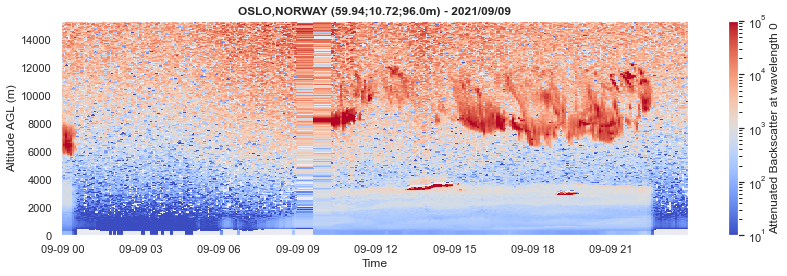

In [2]:
#path = "examples/data/L2_0-20000-006735_A20210908.nc"
path = "examples/data/L2_0-20000-001492_A20210909.nc"
apro_reader = apro.reader.ReadProfiles(path)
profiles = apro_reader.read()

profiles.range_correction(inplace=True)
profiles.extrapolation_lowest_layers(zmin=300, inplace=True)
profiles.gaussian_filter(sigma=0.0, inplace=True)
profiles.plot(log=True, vmin=1e1, vmax=1e5)

100%|██████████| 273/273 [00:01<00:00, 204.57it/s]
No handles with labels found to put in legend.


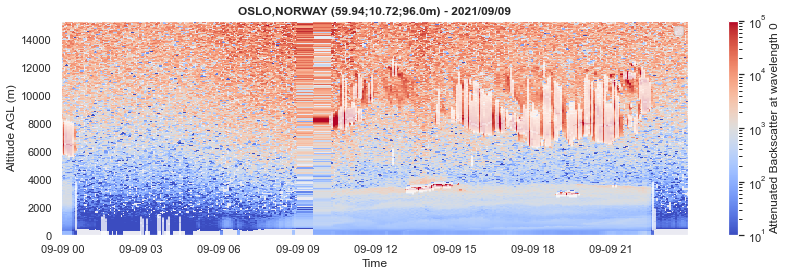

In [3]:
profiles.detect_clouds(time_avg=15, thr_noise=5, thr_clouds=4, verbose=True).plot(show_clouds=True, log=True, vmin=1e1, vmax=1e5)

In [27]:
def _plot_clouds(da):
    """Plot clouds as markers.
    Args:
        da ([type]): [description]
    """
    time = da.time.data #time
    altitude = da.altitude.data - da.station_altitude.data #altitude AGL

    for i in range(len(time)):
        #plot bases
        b_indexes = [i for i, x in enumerate(da.clouds_bases[i,:].data) if x]
        p_indexes = [i for i, x in enumerate(da.clouds_peaks[i,:].data) if x]
        t_indexes = [i for i, x in enumerate(da.clouds_tops[i,:].data) if x]
        
        #plot from base to peak
        for j, _ in enumerate(b_indexes):
            y = altitude[b_indexes[j]:p_indexes[j]]
            x = [time[i] for _ in y]
            plt.plot(x, y, 'w-', alpha=0.5)

        #plot from peak to base
        for j, _ in enumerate(b_indexes):
            y = altitude[p_indexes[j]:t_indexes[j]]
            x = [time[i] for _ in y]
            plt.plot(x, y, 'w-', alpha=0.5)


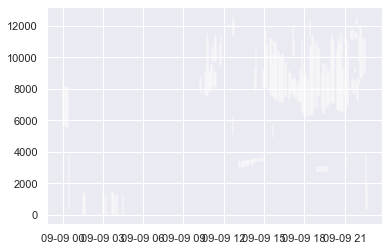

In [28]:
_plot_clouds(profiles.data)

In [22]:
np.ones(10)*profiles.data.time.data[0]

UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('float64') and dtype('<M8[ns]')

In [31]:
requested_datetime.tobytes()

b'\x80/:a\x00\x00\x00\x00'

In [7]:
profiles.data

<xarray.Dataset>
Dimensions:                          (altitude: 511, layer: 3, time: 273)
Coordinates:
  * time                             (time) datetime64[ns] 2021-09-09T00:00:04 ... 2021-09-09T23:55:06
  * altitude                         (altitude) float64 111.0 ... 1.541e+04
Dimensions without coordinates: layer
Data variables:
    start_time                       (time) datetime64[ns] ...
    latitude                         (time, altitude) float64 ...
    longitude                        (time, altitude) float64 ...
    attenuated_backscatter_0         (time, altitude) float64 89.8 ... 788.4
    uncertainties_att_backscatter_0  (time, altitude) float64 ...
    l0_wavelength                    float64 ...
    station_longitude                float64 10.72
    station_latitude                 float64 59.94
    station_altitude                 float64 96.0
    quality_flag                     (time, altitude) int64 ...
    vertical_visibility              (time) float64 ...
    

In [15]:
time[0]

numpy.datetime64('2021-09-09T00:00:04.000000000')

In [3]:
a = [True, True, True, True]
a[0:2] = [False for i in range(len(a[0:2]))]

In [4]:
a

[False, False, True, True]